# Import library

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [4]:
# load data
df = pd.read_csv('dataset/Books_Data_Clean.xls')

# EDA

In [5]:
df.info()
df.head()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [6]:
df.describe()


,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


### Cleaning data

In [7]:
# Menghapus baris yang memiliki nilai NaN
df_clean = df.dropna()
df_clean.shape

(998, 15)

In [8]:
# Menghapus kolom yang tidak diperlukan
df_clean = df_clean.drop(['language_code', 'Publishing Year' ], axis=1, inplace= False)
df_clean.head()

,index,Book Name,Author,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,Beowulf,"Unknown, Seamus Heaney",Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,Go Set a Watchman,Harper Lee,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,When You Are Engulfed in Flames,David Sedaris,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,Daughter of Smoke & Bone,Laini Taylor,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [9]:
# menghapus data duplikat
data_dupicat=df_clean.duplicated()
if data_dupicat.sum() > 0:
    print(f"{data_dupicat.sum()} data duplikat ditemukan. Menghapus duplikat...")
    df = df.drop_duplicates()
    print("Data setelah penghapusan duplikat:")
    display(df)
else:
    print("tidak ada data duplikat")

tidak ada data duplikat


# Transform data

In [10]:
# Ubah nama kolom agar lebih mudah digunakan
df_clean.columns = [col.strip().replace(' ', '_').lower() for col in df_clean.columns]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                998 non-null    int64  
 1   book_name            998 non-null    object 
 2   author               998 non-null    object 
 3   author_rating        998 non-null    object 
 4   book_average_rating  998 non-null    float64
 5   book_ratings_count   998 non-null    int64  
 6   genre                998 non-null    object 
 7   gross_sales          998 non-null    float64
 8   publisher_revenue    998 non-null    float64
 9   sale_price           998 non-null    float64
 10  sales_rank           998 non-null    int64  
 11  publisher            998 non-null    object 
 12  units_sold           998 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 109.2+ KB


In [11]:
# mengubah value pada kolom "genre"
df_clean['genre'] = df_clean['genre'].replace('genre fiction', 'fiction')
df_clean['genre'].value_counts()

genre
fiction       827
nonfiction    156
children       15
Name: count, dtype: int64

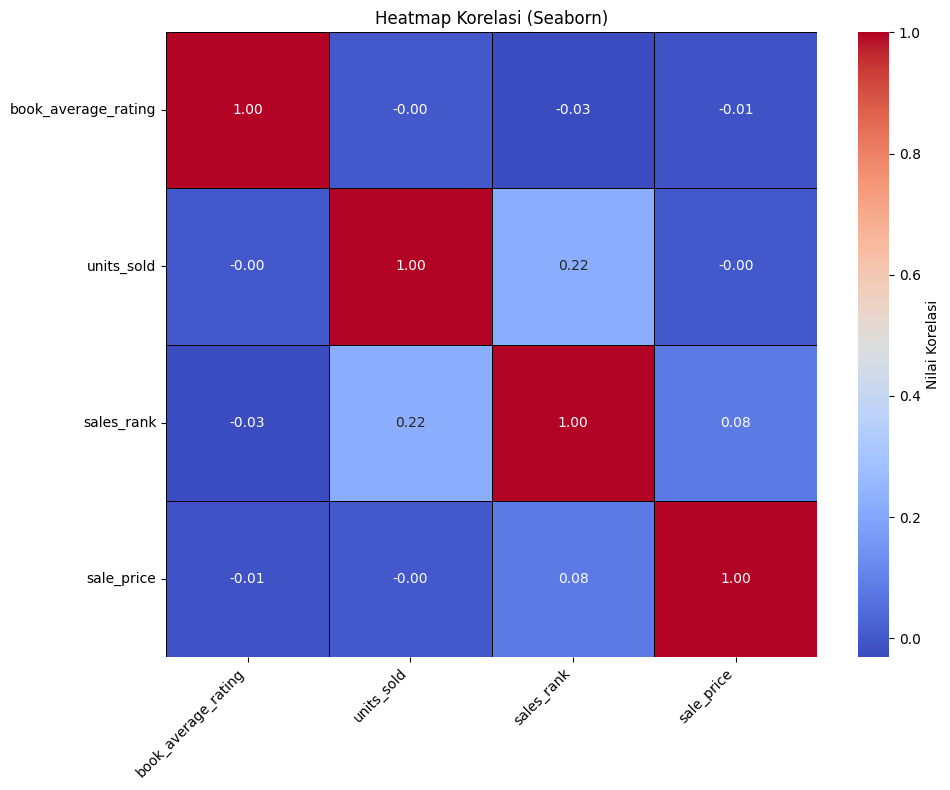

In [12]:
correlation = df_clean[[ "book_average_rating", "units_sold", "sales_rank","sale_price"]].corr()
correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,
            annot=True,     
            cmap='coolwarm', 
            fmt=".2f",      
            linewidths=.5, 
            linecolor='black', 
            cbar_kws={'label': 'Nilai Korelasi'}) 

plt.title('Heatmap Korelasi (Seaborn)')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()
plt.show()


In [13]:
# save data
path = 'clean-data/Books_Data_Clean.csv'
df_clean.to_csv(path, index=False)

# New Feature

In [14]:
# Mapping kategori author_rating ke skor numerik
author_rating_map = {
    'Novice': 1,
    'Intermediate': 2,
    'Famous': 3,
    'Excellent': 4
}
df_clean['author_rating_score'] = df_clean['author_rating'].map(author_rating_map)

# Hitung Author Popularity Score
df_clean['author_popularity_score'] = (
    df_clean['author_rating_score'] * 0.3 +
    df_clean['book_average_rating'] * 0.3 +
    np.log10(1 + df_clean['book_ratings_count']) * 0.4
)
# Profit margin sales
df_clean["profit_margin"] = df_clean["gross_sales"] - df_clean["publisher_revenue"]
# Revenue per unit sold
df_clean["revenue_per_unit"] = df_clean["publisher_revenue"] / df_clean["units_sold"]
# Weighted average rating
df_clean["rating_weighted"] = df_clean["book_average_rating"] * df_clean["book_ratings_count"]
df_clean.head()




,index,book_name,author,author_rating,book_average_rating,book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,publisher,units_sold,author_rating_score,author_popularity_score,profit_margin,revenue_per_unit,rating_weighted
0,0,Beowulf,"Unknown, Seamus Heaney",Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,1,3.403143,13664.0,2.928,533188.26
1,1,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,2,3.933868,4975.0,1.194,614479.41
2,2,Go Set a Watchman,Harper Lee,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,1,3.349793,19118.0,5.214,458994.39
3,3,When You Are Engulfed in Flames,David Sedaris,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,2,3.883475,16500.0,4.500,609627.92
4,4,Daughter of Smoke & Bone,Laini Taylor,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,2,3.930915,15181.0,4.794,801063.32


In [15]:
# save data
path = 'clean-data/sales-book-clean.csv'
df_clean.to_csv(path, index=False)

In [16]:
# Mengetahui berapa buku yang terjual secara keseluruhan
total_buku_terjual = df_clean['units_sold'].sum()
print(f"Total buku terjual: {total_buku_terjual}")

Total buku terjual: 9782708


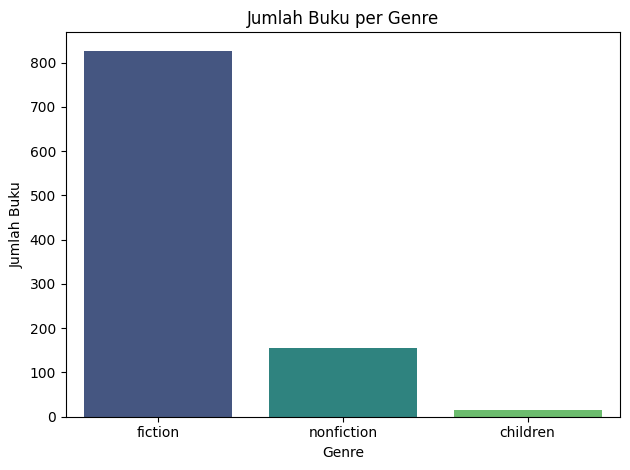

In [17]:


plt.figure()
sns.countplot(data=df_clean, x='genre', order=df_clean['genre'].value_counts().index , palette='viridis',hue='genre',legend=False)
plt.title("Jumlah Buku per Genre")
plt.xlabel("Genre")
plt.ylabel("Jumlah Buku")
plt.tight_layout()
plt.show()

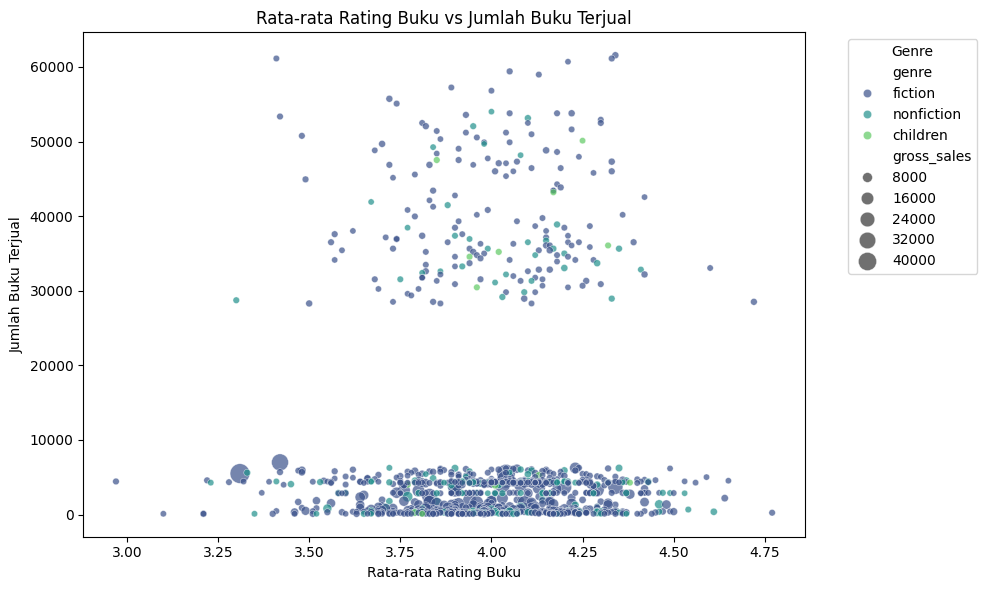

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='book_average_rating', y='units_sold', hue='genre', palette='viridis', alpha=0.7,size='gross_sales', sizes=(20, 200), edgecolor='w')
plt.title("Rata-rata Rating Buku vs Jumlah Buku Terjual")
plt.xlabel("Rata-rata Rating Buku")
plt.ylabel("Jumlah Buku Terjual")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

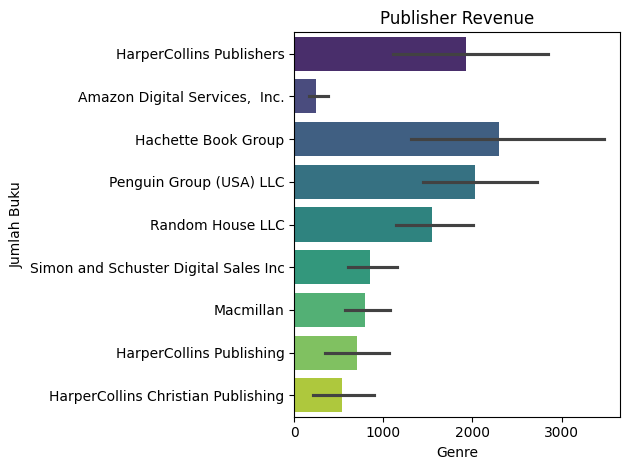

In [19]:
plt.figure()
sns.barplot(data=df_clean, x='publisher_revenue', y='publisher', palette='viridis',hue='publisher',legend=False)
plt.title("Publisher Revenue")
plt.xlabel("Genre")
plt.ylabel("Jumlah Buku")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 author')

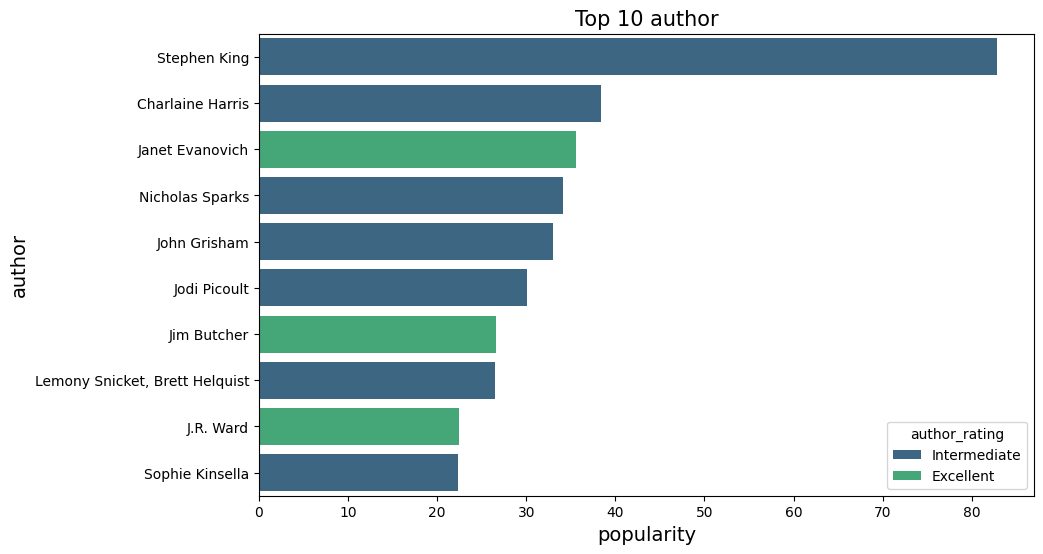

In [20]:
top10_penulis = df_clean.groupby(['author','author_rating'])['author_popularity_score'].sum().sort_values(ascending= False)[0:10].reset_index()
top10_penulis.columns = ['author', 'author_rating','author_popularity_score' ]
top10_penulis = top10_penulis.sort_values(by='author_popularity_score', ascending=False)
top10_penulis


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='author_popularity_score', y='author', data=top10_penulis,hue='author_rating' ,legend = True, palette='viridis')
ax.set_xlabel( xlabel = 'popularity', fontsize = 14)
ax.set_ylabel ( ylabel = 'author', fontsize = 14)
ax.set_title(label= "Top 10 author", fontsize= 15)